In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Scaling

Scaling changes the range of features in our dataset.

0. tldr

    - Use a min-max scaler before you do modeling.
    - Generally prefer unscaled data, except in modeling.
    - Learn parameters for scaling from the training split.

1. Scaling - when, where, what, why, and how

    - why
        - some model types can be thrown off by different feature scales
        - improves most model's implementation
        - visualize the combination of 2 variables with different scales
        - a better interpretation of the data (e.g. log scaling)
        - combining features
    - when
        - data prep / exploration
        - pipeline: prep
        - lifecycle: prep/exploration
        - when one of the conditions above is met. Otherwise, it's better to work with the original units
    - where
        - the training dataset
        - usually just the independent variables
        - indep vars are scaled independently, i.e. the scaling of one feature doesn't affect the scaling of another
        - scale whatever goes into the model
    - how
        - `sklearn.preprocessing` -- requires 2d array
        - make the thing, fit the thing, use the thing
        - `.fit` to learn parameters, `.transform` to apply the scaling
        - seperate scaled dataframes and/or columns

## Why Scale? A Motivating Example

In [3]:
train = pd.read_csv('https://gist.githubusercontent.com/zgulde/66989745314d2c68ab62fae13743f094/raw/71635c6281b5e2a36e3eb4578cab277eb09743ec/train.csv')
test = pd.read_csv('https://gist.githubusercontent.com/zgulde/66989745314d2c68ab62fae13743f094/raw/71635c6281b5e2a36e3eb4578cab277eb09743ec/test.csv')
print('train shape: %d x %d' % train.shape)
print('test shape: %d x %d' % test.shape)
train.head()

train shape: 90 x 3
test shape: 10 x 3


,flavor,pints,n_sprinkles
0,blueberry,7.675963,921.808798
1,blueberry,7.129386,1186.329821
2,pistachio,12.182332,443.310335
3,pistachio,13.955832,832.502384
4,chocolate,10.748216,892.000000


In [4]:
X_train, X_test = train[['pints', 'n_sprinkles']], test[['pints', 'n_sprinkles']]
y_train, y_test = train.flavor, test.flavor

In [5]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3

In [9]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model.fit(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)

0.8

In [13]:
X_train_scaled

array([[0.32166942, 0.47369646],
       [0.26530034, 0.65844254],
       [0.7864154 , 0.13950482],
       [0.96931818, 0.41132331],
       [0.63851367, 0.45287748],
       [0.74170591, 0.38235401],
       [0.8339593 , 0.83991991],
       [0.92655998, 0.60778174],
       [0.32319719, 0.67659165],
       [0.95528497, 0.55441674],
       [0.73454732, 0.58845819],
       [0.74464029, 0.82682458],
       [0.59470913, 0.4375123 ],
       [0.32709122, 0.37325337],
       [0.40873287, 0.41044952],
       [0.68120868, 0.3732579 ],
       [0.91706207, 0.70691314],
       [0.527061  , 0.60583089],
       [0.19730615, 0.30729261],
       [0.64460055, 0.33973387],
       [0.75990061, 0.26916751],
       [0.20132226, 0.52800637],
       [0.43064629, 0.5220208 ],
       [0.70890344, 0.71658905],
       [0.55880979, 0.52690972],
       [0.829315  , 0.67218054],
       [0.47642824, 0.58906887],
       [0.61288816, 0.2405586 ],
       [0.07136717, 0.88291304],
       [0.5648706 , 0.48500468],
       [0.

What's going on?

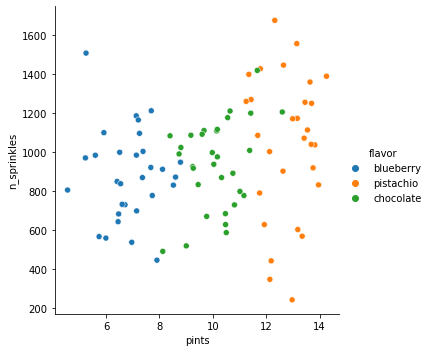

In [14]:
sns.relplot(data=train, y='n_sprinkles', x='pints', hue='flavor')

(-800.0, 800.0)

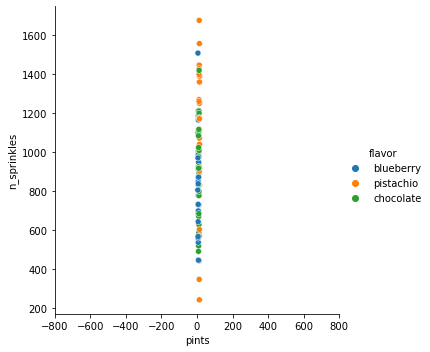

In [15]:
sns.relplot(data=train, y='n_sprinkles', x='pints', hue='flavor')
plt.xlim(-800, 800)

Distance between 2 points

$$
\sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
$$

> One person's magic is another person's engineering.

### Another Example

In [16]:
df = pydataset.data('sat.act')
df.head()

,gender,education,age,ACT,SATV,SATQ
29442,2,3,19,24,500,500.0
29457,2,3,23,35,600,500.0
29498,2,3,20,21,480,470.0
29503,1,4,27,26,550,520.0
29504,1,2,33,31,600,550.0


<AxesSubplot:xlabel='gender'>

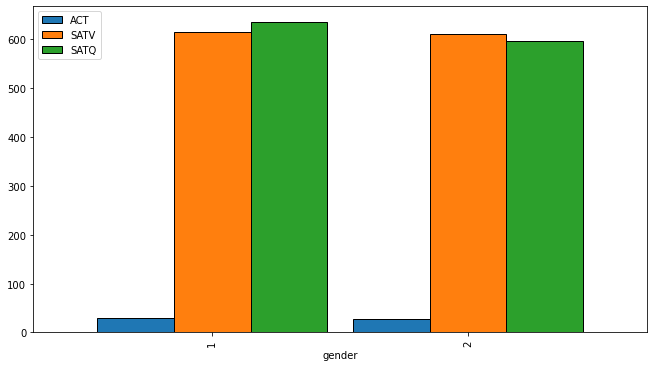

In [17]:
df[['gender', 'ACT', 'SATV', 'SATQ']].groupby('gender').mean().plot.bar(figsize=(11, 6), ec='black', width=.9)

<AxesSubplot:xlabel='gender'>

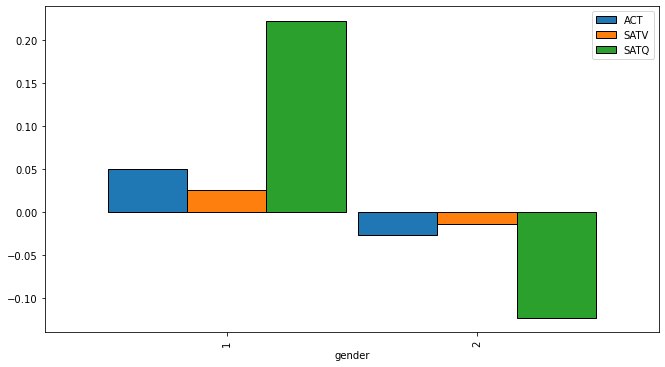

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler

cols = ['education', 'age', 'ACT', 'SATQ', 'SATV']
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])
df[['gender', 'ACT', 'SATV', 'SATQ']].groupby('gender').mean().plot.bar(figsize=(11, 6), ec='black', width=.95)

## Linear Scaling

- Units are changed, but the distance between points is preserved.

- MinMax: everything between 0 and 1

    $$ x' = \frac{x - \text{max}(x)}{\text{max}(x) - \text{min}(x)} $$

- Standard: a zscore, standard deviations from the mean, **center** + **scale**

    $$ x' = \frac{x - \bar{x}}{s_x} $$

    - **centering**: subtracting the mean
    - **scaling**: dividing by the standard deviation

- Robust: robust to and preserves outliers

    $$ x' = \frac{x - \text{med}(x)}{\text{IQR}_x} $$

When scaling a single column, make sure to pass it to the scaler object as a dataframe, not as a series.

In [19]:
scaling_example = pd.DataFrame()
scaling_example['x1'] = np.arange(1, 11)
scaling_example['x2'] = [-100, -1, 0, 1, 2, 3, 4, 5, 100, 1000]

In [20]:
scaling_example

,x1,x2
0,1,-100
1,2,-1
2,3,0
3,4,1
4,5,2
5,6,3
6,7,4
7,8,5
8,9,100
9,10,1000


In [21]:
scaler = MinMaxScaler()
scaler.fit_transform(scaling_example[['x1']])

array([[0.        ],
       [0.11111111],
       [0.22222222],
       [0.33333333],
       [0.44444444],
       [0.55555556],
       [0.66666667],
       [0.77777778],
       [0.88888889],
       [1.        ]])

In [22]:
scaler = MinMaxScaler()
scaling_example[['x1_minmax', 'x2_minmax']] = scaler.fit_transform(scaling_example[['x1', 'x2']])

scaler = StandardScaler()
scaling_example[['x1_standard', 'x2_standard']] = scaler.fit_transform(scaling_example[['x1', 'x2']])

scaler = RobustScaler()
scaling_example[['x1_robust', 'x2_robust']] = scaler.fit_transform(scaling_example[['x1', 'x2']])

In [23]:
scaling_example[sorted(scaling_example)] # sort columns alphabetically

,x1,x1_minmax,x1_robust,x1_standard,x2,x2_minmax,x2_robust,x2_standard
0,1,0.000000,-1.000000,-1.566699,-100,0.000000,-22.777778,-0.664996
1,2,0.111111,-0.777778,-1.218544,-1,0.090000,-0.777778,-0.338111
2,3,0.222222,-0.555556,-0.870388,0,0.090909,-0.555556,-0.334809
3,4,0.333333,-0.333333,-0.522233,1,0.091818,-0.333333,-0.331507
4,5,0.444444,-0.111111,-0.174078,2,0.092727,-0.111111,-0.328205
5,6,0.555556,0.111111,0.174078,3,0.093636,0.111111,-0.324904
6,7,0.666667,0.333333,0.522233,4,0.094545,0.333333,-0.321602
7,8,0.777778,0.555556,0.870388,5,0.095455,0.555556,-0.318300
8,9,0.888889,0.777778,1.218544,100,0.181818,21.666667,-0.004623
9,10,1.000000,1.000000,1.566699,1000,1.000000,221.666667,2.967056


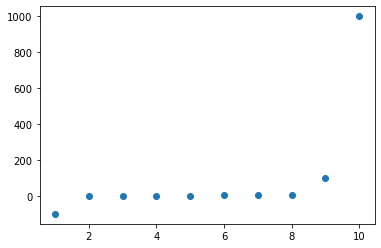

In [24]:
plt.scatter(scaling_example.x1, scaling_example.x2)

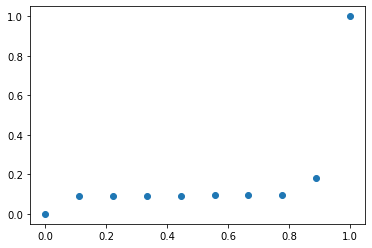

In [25]:
plt.scatter(scaling_example.x1_minmax, scaling_example.x2_minmax)

## Non-linear Scaling

- The distance between points is **not** preserved, but order is
- Not as common as linear scalers
- In sklearn: power transformation: box-cox, yeo-johnson; quantile transformation
- Log

    $$ x' = \log_b{x} $$

    $$ b^{x'} = x $$

    Sometimes you can just set the x/y scale w/ matplotlib instead of
    actually transforming the data

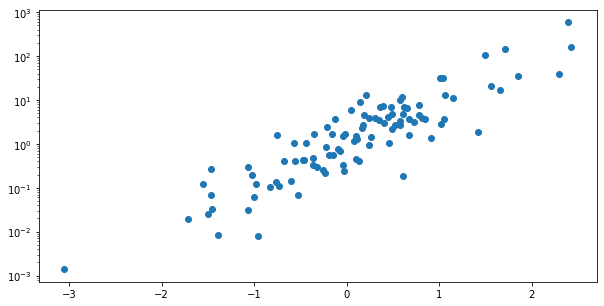

In [32]:
# np.random.seed(1)
n = 100

df = pd.DataFrame()
df['x1'] = np.random.randn(n)
df['x2'] = 10 ** (df.x1 + np.random.randn(n) * .5)

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df.x1, df.x2)
ax.set_yscale('log')

<AxesSubplot:ylabel='Frequency'>

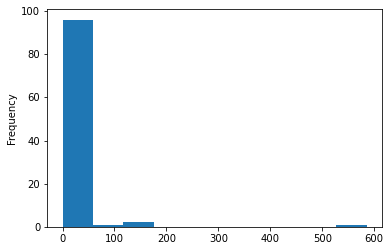

In [33]:
df.x2.plot.hist()

(array([ 1.,  2.,  5., 12., 18., 25., 25.,  8.,  2.,  2.]),
 array([-6.58761129, -5.291531  , -3.9954507 , -2.6993704 , -1.40329011,
        -0.10720981,  1.18887049,  2.48495078,  3.78103108,  5.07711138,
         6.37319168]),
 <BarContainer object of 10 artists>)

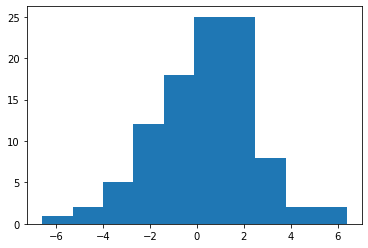

In [34]:
plt.hist(np.log(df.x2))

If we want to predict $y$ based on $x$ and there is a linear relationship between them, the model

$$ y = mx + b $$

works pretty well.

However, if the relationship is exponential, that model does not make great predictions, but instead we could transform x:

$$ y = m(log(x)) + b $$

And still get decent predictions

## Futher Reading

- [Interactive Scaling Demo](https://stats-demos.zach.wiki/scaling)
- [min max scaling example](https://stats-demos.zach.wiki/static/min-max-scaling.mp4)
- [centering and scaling example](https://stats-demos.zach.wiki/static/center-and-scale.mp4)